# Assignment 12
## Applied Machine Learning

Andrew Chan 
EBE869

Credit card fraud costs about 1% to the banks, an amount which customers (us) eventually
pay. Let's find those anomalies which might reveal fraud. Download the popular credit card
dataset from Kaggle.

# 1. [10 pts] Pre-process the dataset, and then apply normalization or standardization, list number of rows and columns, check sanity

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

# Locate and load the data file
df = pd.read_csv('creditcard.csv')

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Mean Imputation

In [6]:
df = df.fillna(df.mean())

## Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_without_target = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount']
df[columns_without_target] = scaler.fit_transform(df[columns_without_target])

## Correlation for feature reduction

In [8]:
df.corr().sort_values(by='Class', ascending=False)['Class']

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

## Selecting highly correlated features with 'Class'


|Feature|Corr|
-|-
V11    |     0.154876  
V4     |     0.133447  
V1     |   -0.101347  
V18    |  -0.111485  
V7     |    -0.187257  
V3     |    -0.192961  
V16    |    -0.196539  
V10    |    -0.216883  
V12    |    -0.260593  
V14    |    -0.302544  
V17    |    -0.326481  

In [9]:
# selected_features_with_label = ['V11','V4','V1','V18','V7','V3','V16','V10','V12','V14','V17','Class']
selected_features_with_label = ['V10','V12','V14','V17','Class']

In [10]:
df = df[selected_features_with_label]

## Sanity check number of rows and columns

In [11]:
# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.head()

N rows=284807, M columns=5


,V10,V12,V14,V17,Class
0,0.083386,-0.618296,-0.324610,0.244863,0
1,-0.153350,1.066089,-0.149982,-0.135170,0
2,0.190700,0.066137,-0.173114,1.306868,0
3,-0.050468,0.178371,-0.300360,-0.805445,0
4,0.691625,0.538627,-1.168034,-0.279081,0


# 2. [10 pts] Check the class balance and pick an evaluation metric.

### Class Balance

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Evaluation Metric

Since the class balance is heavily skewed towards no fraud, we should use `Recall` (`true positive rate`) since we'd rather error on the side of caution and label fraud versus not. If we miss fraud we could potentially lose a lot of money if a customer cancels their credit card with us:

$RECALL = TPR = \frac{TP}{P} = \frac{TP}{FN + TP}$

# 3. [20 pts] Split the dataset 50-50 for training and testing. 
Then run DecisionTreeClassifier,
SVC, MLPClassifier without any tree pruning or regularization. Report the classification
performance.

In [13]:
X = df.drop(['Class'], axis=1).values
y = df['Class'].values

## 50-50 split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)

## DecisionTreeClassifier

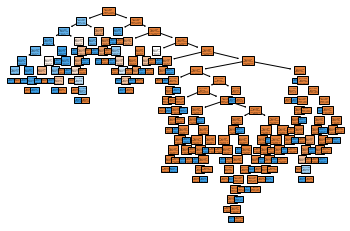

In [15]:
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

fig = plt.subplots(nrows=1, ncols=1)
tree.plot_tree(clf1,
              class_names=list(map(lambda x: str(x),df['Class'].unique())),
              filled = True)

plt.show()

In [16]:
y_pred = clf1.predict(X_test)
print('RECALL SCORE:',metrics.recall_score(y_test,y_pred))

RECALL SCORE: 0.6995884773662552


## SVC

In [17]:
from sklearn import svm
clf_rbf_svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
y_pred = clf_rbf_svc.predict(X_test)
print('RECALL SCORE:',metrics.recall_score(y_test,y_pred))

RECALL SCORE: 0.6707818930041153


## MLP Classifier

In [18]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier(hidden_layer_sizes=(10,), alpha=0, random_state=None, max_iter=10000).fit(X_train,y_train)
y_pred = mlp1.predict(X_test)
print('RECALL SCORE:',metrics.recall_score(y_test,y_pred))

RECALL SCORE: 0.7078189300411523


# 4. [20 pts] Run DecisionTreeClassifier, SVC, MLPClassifier with tree pruning and regularization 
(Hint: Use GridSearchCV to optimize the regularization parameters). Report
the classification performance.

## Decision Tree

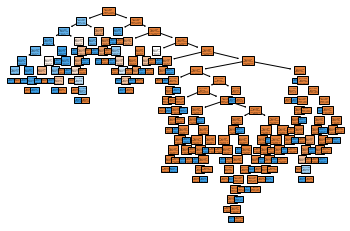

In [19]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'ccp_alpha':[1e-12, 1e-9, 1e-6, 1e-3]}
clf_dt = tree.DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(clf_dt, parameters, scoring = 'recall')
clf.fit(X_train, y_train)

fig = plt.subplots(nrows=1, ncols=1)
tree.plot_tree(clf.best_estimator_,
              class_names=list(map(lambda x: str(x),df['Class'].unique())),
              filled = True)
plt.show()

In [20]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.876610,0.071107,0.010121,0.000024,1e-12,{'ccp_alpha': 1e-12},0.76,0.84,0.76,0.714286,0.70,0.754857,0.048903,1
1,1.287351,0.471503,0.011606,0.006136,1e-09,{'ccp_alpha': 1e-09},0.76,0.84,0.76,0.714286,0.70,0.754857,0.048903,1
2,1.114341,0.330069,0.008513,0.003230,1e-06,{'ccp_alpha': 1e-06},0.76,0.84,0.76,0.714286,0.70,0.754857,0.048903,1
3,0.863318,0.081805,0.004853,0.005197,0.001,{'ccp_alpha': 0.001},0.68,0.80,0.64,0.612245,0.48,0.642449,0.103480,4


In [21]:
y_pred = clf.best_estimator_.predict(X_test)
dt_recall_50 = metrics.recall_score(y_test,y_pred)
print('RECALL SCORE:', dt_recall_50)

RECALL SCORE: 0.6995884773662552


## SVC

In [22]:
parameters = {'kernel':['rbf'], 'C':[1e-3,10,1e3]}
clf_rbf_svc = GridSearchCV(svm.SVC(), parameters, scoring = 'recall')
clf_rbf_svc.fit(X_train, y_train)
y_pred = clf_rbf_svc.best_estimator_.predict(X_test)

In [23]:
pd.DataFrame(clf_rbf_svc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.115202,0.005738,0.188038,0.004143,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,3
1,49.581522,21.272225,0.585807,0.208941,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.7,0.72,0.74,0.673469,0.64,0.694694,0.035109,1
2,8.885013,1.887548,0.154199,0.007585,1000,rbf,"{'C': 1000.0, 'kernel': 'rbf'}",0.6,0.62,0.64,0.591837,0.56,0.602367,0.026976,2


In [24]:
clf_rbf_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [25]:
pd.DataFrame(clf_rbf_svc.cv_results_)
svc_recall_50 = metrics.recall_score(y_test,y_pred)
print('RECALL SCORE:',svc_recall_50)

RECALL SCORE: 0.6666666666666666


## MLP

In [26]:
parameters = {'alpha':[1e-6,1e-3,1]}
clf_mlp = GridSearchCV(MLPClassifier(hidden_layer_sizes=(10,), random_state=None, max_iter=10000), parameters, scoring = 'recall')
clf_mlp.fit(X_train, y_train)
y_pred = clf_mlp.best_estimator_.predict(X_test)

In [27]:
pd.DataFrame(clf_mlp.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.695324,3.268341,0.019006,0.009311,1e-06,{'alpha': 1e-06},0.70,0.72,0.68,0.734694,0.70,0.706939,0.018777,2
1,7.980797,2.155068,0.020162,0.011093,0.001,{'alpha': 0.001},0.72,0.82,0.70,0.816327,0.70,0.751265,0.055120,1
2,8.791607,1.290685,0.016509,0.007825,1,{'alpha': 1},0.56,0.54,0.56,0.448980,0.42,0.505796,0.059389,3


In [28]:
clf_mlp.best_params_

{'alpha': 0.001}

In [29]:
pd.DataFrame(clf_mlp.cv_results_)
mlp_recall_50 = metrics.recall_score(y_test,y_pred)
print('RECALL SCORE:',mlp_recall_50)

RECALL SCORE: 0.7283950617283951


# 5. [20 pts] Attempt avoiding overfitting while the training is reduced. 
Add splits 40-60, 30-70, 20-80, 10-90, 5-95 and repeat step 3 and step 4.

Let's make a function that will run through all three: DecisionTreeClassifier, SVC, MLPClassifier so we avoid repeated code and bugs:

In [30]:

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier


def trainSweep3Models(test_per, X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_per, random_state=0)
    
    ###################
    ## Decision Tree ##
    ###################
    parameters = {'ccp_alpha':[1e-12, 1e-9, 1e-6, 1e-3]}
    clf_dt = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), parameters, scoring = 'recall')
    clf_dt.fit(X_train, y_train)
    fig = plt.subplots(nrows=1, ncols=1)
    tree.plot_tree(clf_dt.best_estimator_,
                class_names=list(map(lambda x: str(x), df['Class'].unique())),
                filled = True)
    plt.show()
    y_pred = clf_dt.best_estimator_.predict(X_test)
    dt_recall = metrics.recall_score(y_test,y_pred)
    print(pd.DataFrame(clf_dt.cv_results_))
    print('Decision Tree RECALL SCORE:', dt_recall)
    print()

    #########
    ## SVC ##
    #########

    parameters = {'kernel':['rbf'], 'C':[1e-3,10,1e3]}
    clf_svc = GridSearchCV(svm.SVC(), parameters, scoring = 'recall')
    clf_svc.fit(X_train, y_train)
    y_pred =    clf_svc.best_estimator_.predict(X_test)
    svc_recall = metrics.recall_score(y_test,y_pred)
    print(pd.DataFrame(clf_svc.cv_results_))
    print('SVC RECALL SCORE:',svc_recall)
    print()

    #########
    ## MLP ##
    #########

    parameters = {'alpha':[1e-12,1e-9,1e-6,1e-3,1]}
    clf_mlp = GridSearchCV(MLPClassifier(hidden_layer_sizes=(10,), random_state=None, max_iter=10000), parameters, scoring = 'recall')
    clf_mlp.fit(X_train, y_train)
    y_pred = clf_mlp.best_estimator_.predict(X_test)
    mlp_recall = metrics.recall_score(y_test,y_pred)
    print(pd.DataFrame(clf_mlp.cv_results_))
    print('MLP RECALL SCORE:',mlp_recall)
    print()

    return dt_recall, svc_recall, mlp_recall, clf_dt, clf_svc, clf_mlp

# 40-60
---

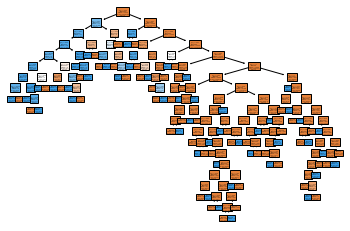

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.833802      0.311184         0.009400        0.005252   
1       1.130538      0.317382         0.008584        0.003235   
2       0.575056      0.073921         0.003678        0.003718   
3       0.570828      0.074121         0.004506        0.004716   

  param_ccp_alpha                params  split0_test_score  split1_test_score  \
0           1e-12  {'ccp_alpha': 1e-12}           0.820513           0.769231   
1           1e-09  {'ccp_alpha': 1e-09}           0.820513           0.769231   
2           1e-06  {'ccp_alpha': 1e-06}           0.820513           0.769231   
3           0.001  {'ccp_alpha': 0.001}           0.769231           0.615385   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.763158           0.815789           0.692308         0.772200   
1           0.763158           0.815789           0.692308         0.772200   
2           0.763158 

In [31]:
dt_recall_40, svc_recall_40, mlp_recall_40, clf_dt_40, clf_svc_40, clf_mlp_40 = trainSweep3Models(0.6,X,y)

## 30-70

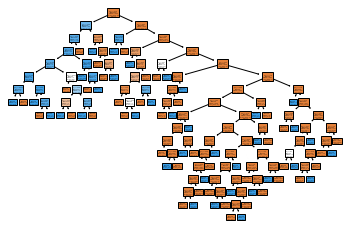

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.882862      0.084844         0.009606        0.000842   
1       0.424304      0.053612         0.005717        0.003938   
2       0.428050      0.053602         0.002890        0.003774   
3       0.425102      0.057633         0.003672        0.004548   

  param_ccp_alpha                params  split0_test_score  split1_test_score  \
0           1e-12  {'ccp_alpha': 1e-12}           0.838710           0.548387   
1           1e-09  {'ccp_alpha': 1e-09}           0.838710           0.548387   
2           1e-06  {'ccp_alpha': 1e-06}           0.838710           0.548387   
3           0.001  {'ccp_alpha': 0.001}           0.677419           0.677419   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.774194           0.774194           0.741935         0.735484   
1           0.774194           0.774194           0.741935         0.735484   
2           0.774194 

In [32]:
%%time
dt_recall_30, svc_recall_30, mlp_recall_30, clf_dt_30, clf_svc_30, clf_mlp_30 = trainSweep3Models(0.7,X,y)

## 20-80

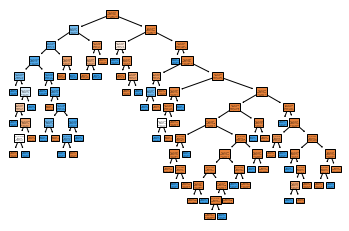

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.292497      0.055407         0.002630        0.002985   
1       0.267818      0.041401         0.001612        0.003225   
2       0.267684      0.041331         0.003671        0.004546   
3       0.267721      0.041403         0.002034        0.003122   

  param_ccp_alpha                params  split0_test_score  split1_test_score  \
0           1e-12  {'ccp_alpha': 1e-12}           0.761905                0.7   
1           1e-09  {'ccp_alpha': 1e-09}           0.761905                0.7   
2           1e-06  {'ccp_alpha': 1e-06}           0.761905                0.7   
3           0.001  {'ccp_alpha': 0.001}           0.714286                0.6   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0                0.7                0.7                0.6         0.692381   
1                0.7                0.7                0.6         0.692381   
2                0.7 

In [33]:
%%time
dt_recall_20, svc_recall_20, mlp_recall_20, clf_dt_20, clf_svc_20, clf_mlp_20 = trainSweep3Models(0.8,X,y)

## 10-90

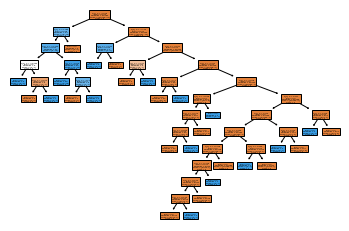

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.089209      0.011542         0.002873        0.002742   
1       0.084925      0.008678         0.002464        0.002957   
2       0.086991      0.012324         0.000824        0.001010   
3       0.087396      0.009784         0.000425        0.000851   

  param_ccp_alpha                params  split0_test_score  split1_test_score  \
0           1e-12  {'ccp_alpha': 1e-12}                0.9                0.7   
1           1e-09  {'ccp_alpha': 1e-09}                0.9                0.7   
2           1e-06  {'ccp_alpha': 1e-06}                0.9                0.7   
3           0.001  {'ccp_alpha': 0.001}                0.7                0.7   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0                0.8                0.7           0.545455         0.729091   
1                0.8                0.7           0.545455         0.729091   
2                0.8 

In [34]:
%%time
dt_recall_10, svc_recall_10, mlp_recall_10, clf_dt_10, clf_svc_10, clf_mlp_10 = trainSweep3Models(0.9,X,y)

## 5-95

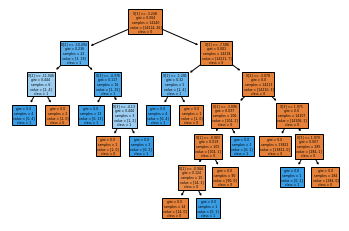

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.019331      0.004102         0.001610        0.003221   
1       0.022391      0.004203         0.000822        0.000785   
2       0.020691      0.000729         0.000410        0.000820   
3       0.020410      0.001336         0.002046        0.003143   

  param_ccp_alpha                params  split0_test_score  split1_test_score  \
0           1e-12  {'ccp_alpha': 1e-12}                1.0                0.8   
1           1e-09  {'ccp_alpha': 1e-09}                1.0                0.8   
2           1e-06  {'ccp_alpha': 1e-06}                1.0                0.8   
3           0.001  {'ccp_alpha': 0.001}                0.8                0.8   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0                0.6                0.6           0.666667         0.733333   
1                0.6                0.6           0.666667         0.733333   
2                0.6 

In [35]:
%%time
dt_recall_5, svc_recall_5, mlp_recall_5, clf_dt_5, clf_svc_5, clf_mlp_5 = trainSweep3Models(0.95,X,y)

# 6. [20 pts] Plot everything you have on a single plot and comment about your results in terms of training size, regularization, etc.

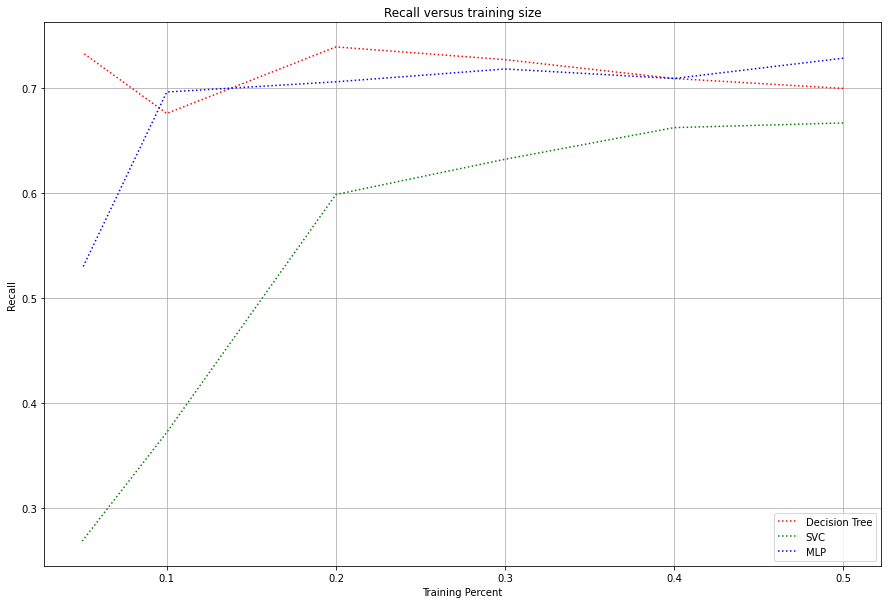

In [36]:
trainingSize = [0.5,0.4,0.3,0.2,0.1,0.05]
recall_dt = [dt_recall_50, dt_recall_40,dt_recall_30,dt_recall_20,dt_recall_10,dt_recall_5]
recall_svc = [svc_recall_50, svc_recall_40,svc_recall_30,svc_recall_20,svc_recall_10,svc_recall_5]
recall_mlp =  [mlp_recall_50,mlp_recall_40,mlp_recall_30,mlp_recall_20,mlp_recall_10,mlp_recall_5]
# Plot
plt.figure(figsize=(15,10))
plt.plot(trainingSize, recall_dt, ':', color='red', label='Decision Tree')
plt.plot(trainingSize, recall_svc, ':', color='green', label='SVC')
plt.plot(trainingSize, recall_mlp, ':', color='blue', label='MLP')

# Labels
plt.title('Recall versus training size')
plt.xlabel('Training Percent')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [37]:
clf_dt_best_params = [clf.best_params_['ccp_alpha'],
                      clf_dt_40.best_params_['ccp_alpha'],
                      clf_dt_30.best_params_['ccp_alpha'],
                      clf_dt_20.best_params_['ccp_alpha'],
                      clf_dt_10.best_params_['ccp_alpha'],
                      clf_dt_5.best_params_['ccp_alpha']]
clf_svc_best_params = [clf_rbf_svc.best_params_['C'],
                       clf_svc_40.best_params_['C'],
                       clf_svc_30.best_params_['C'],
                       clf_svc_20.best_params_['C'],
                       clf_svc_10.best_params_['C'],
                       clf_svc_5.best_params_['C']]
clf_mlp_best_params = [clf_mlp.best_params_['alpha'],
                       clf_mlp_40.best_params_['alpha'],
                       clf_mlp_30.best_params_['alpha'],
                       clf_mlp_20.best_params_['alpha'],
                       clf_mlp_10.best_params_['alpha'],
                       clf_mlp_5.best_params_['alpha']]

In [38]:
clf_dt_best_params

[1e-12, 1e-12, 1e-12, 1e-12, 1e-12, 1e-12]

In [39]:
clf_svc_best_params

[10, 10, 10, 10, 10, 10]

In [40]:
clf_mlp_best_params

[0.001, 0.001, 1e-06, 1e-09, 0.001, 1]

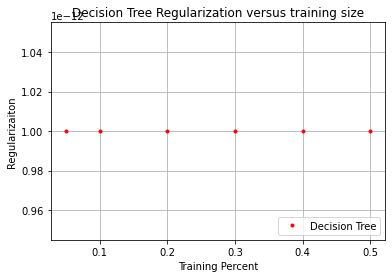

In [41]:
trainingSize = [0.5,0.4,0.3,0.2,0.1,0.05]
# Plot
plt.plot(trainingSize, clf_dt_best_params, '.', color='red', label='Decision Tree')
# plt.plot(trainingSize, clf_svc_best_params, '.', color='green', label='SVC')
# plt.plot(trainingSize, clf_mlp_best_params, '.', color='blue', label='MLP')

# Labels
plt.title('Decision Tree Regularization versus training size')
plt.xlabel('Training Percent')
plt.ylabel('Regularizaiton')
plt.legend(loc='lower right')
plt.grid()
plt.show()

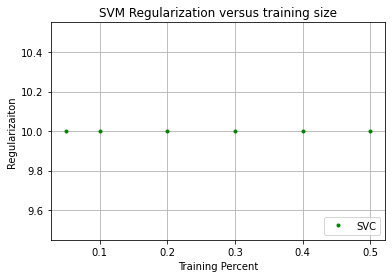

In [42]:
trainingSize = [0.5,0.4,0.3,0.2,0.1,0.05]
# Plot
plt.plot(trainingSize, clf_svc_best_params, '.', color='green', label='SVC')

# Labels
plt.title('SVM Regularization versus training size')
plt.xlabel('Training Percent')
plt.ylabel('Regularizaiton')
plt.legend(loc='lower right')
plt.grid()
plt.show()

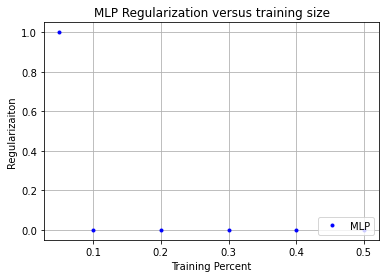

In [43]:
trainingSize = [0.5,0.4,0.3,0.2,0.1,0.05]
# Plot

plt.plot(trainingSize, clf_mlp_best_params, '.', color='blue', label='MLP')

# Labels
plt.title('MLP Regularization versus training size')
plt.xlabel('Training Percent')
plt.ylabel('Regularizaiton')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Discussion:
* It seems that training amount is affects `SVM` the most as an increasing in training size causes increase in `recall` score.
* For decision tree and MLP, regularization does not seems to change `recall` versus change in training size.
* For decision tree, the best regularization parameter `ccp_alpha` is 1e-12 which is the the least regularization. Thus it seems that increase regularization does not help the model as training size decreases. 
* For SVC, it seems that the best regularization parameter `C` is 10 which is the least regularization. Thus it seems that increasing regularization does not help the model as training size decreases.
* For MLP, it seems that regularization varies at different training percentages but there is no discernable pattern.